In [182]:
# Here we import all libraries
import numpy as np
import gym
import matplotlib.pyplot as plt
import os
import torch
import random
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from collections import deque 
import torchvision
import torch.nn.functional as F

import sys
env = gym.make("ALE/Pong-v5")



In [183]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [184]:
env.observation_space.shape

(210, 160, 3)

In [185]:
env.action_space.n

6

In [186]:
#Hyperparameters
episodes = 20000*10
eps = 1.0
learning_rate = 0.001
tot_rewards = []
tot_loss = []
decay_val = 0.0001
mem_size = 1000000
batch_size = 300
gamma = 0.99
update_target = 100
max_steps = 200
PATH = "./saved_models/pong"

In [187]:
class NeuralNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(NeuralNetwork, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.conv1 = nn.Conv2d(state_size,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(29008, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, action_size)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [188]:
print(env.observation_space.shape[2])
model = NeuralNetwork(env.observation_space.shape[2], env.action_space.n).to(device)
target = NeuralNetwork(env.observation_space.shape[2], env.action_space.n).to(device)

opt = torch.optim.Adam(params=model.parameters(), lr=learning_rate)
replay_buffer = deque(maxlen=mem_size)

3


In [189]:
# # Testing code

# state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)
# state= state.reshape(1, 3, 250, 160)
# print("state = ", state.shape)
# out = model(state)
# print("out = ", out)

In [190]:
def compute_td_loss(batch_size):
    state, next_state, reward, done, action = zip(*random.sample(replay_buffer, batch_size))
#     state = torch.stack(list(state), dim=0).reshape(batch_size, -1)
#     print("Shape of state = ", torch.stack(list(state), dim=0).squeeze(1).shape)
    state = torch.stack(list(state), dim=0).squeeze(1)
    state= state.reshape(batch_size, 3, 210, 160).to(device)
#     print("next state shape ", torch.from_numpy(np.array(next_state)).reshape(batch_size, 3, 250, 160).shape)
#     next_state = torch.from_numpy(np.array(next_state).reshape(batch_size, -1)).type(torch.float32)

    next_state = torch.from_numpy(np.array(next_state)).reshape(batch_size, 3, 210, 160).type(torch.float32).to(device)
    
    reward = torch.from_numpy(np.array(reward)).to(device)
    done = torch.from_numpy(np.array(done)).long().to(device)
    action = torch.from_numpy(np.array(action)).type(torch.int64).to(device)
    
    q_values = model(state)
    next_q_values = target(next_state)

    q_vals = q_values.gather(dim=-1, index=action.reshape(-1,1))
    max_next_q_values = torch.max(next_q_values,-1)[0].detach()

    loss = ((reward + gamma*max_next_q_values*(1-done) - q_vals.squeeze())**2).mean()

    opt.zero_grad()
    loss.backward()
    opt.step()
    return loss
    

frame_index =  0
frame_index =  1
frame_index =  2
frame_index =  3
frame_index =  4
frame_index =  5
frame_index =  6
frame_index =  7
frame_index =  8
frame_index =  9
frame_index =  10
frame_index =  11
frame_index =  12
frame_index =  13
frame_index =  14
frame_index =  15
frame_index =  16
frame_index =  17
frame_index =  18
frame_index =  19
frame_index =  20
frame_index =  21
frame_index =  22
frame_index =  23
frame_index =  24
frame_index =  25
frame_index =  26
frame_index =  27
frame_index =  28
frame_index =  29
frame_index =  30
frame_index =  31
frame_index =  32
frame_index =  33
frame_index =  34
frame_index =  35
frame_index =  36
frame_index =  37
frame_index =  38
frame_index =  39
frame_index =  40
frame_index =  41
frame_index =  42
frame_index =  43
frame_index =  44
frame_index =  45
frame_index =  46
frame_index =  47
frame_index =  48
frame_index =  49
frame_index =  50
frame_index =  51
frame_index =  52
frame_index =  53
frame_index =  54
frame_index =  55
fr

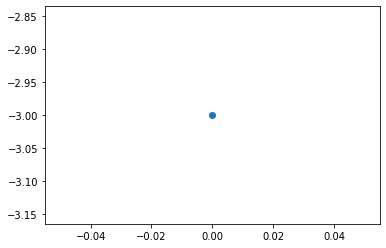

frame_index =  200
frame_index =  201
frame_index =  202
frame_index =  203
frame_index =  204
frame_index =  205
frame_index =  206
frame_index =  207
frame_index =  208
frame_index =  209
frame_index =  210
frame_index =  211
frame_index =  212
frame_index =  213
frame_index =  214
frame_index =  215
frame_index =  216
frame_index =  217
frame_index =  218
frame_index =  219
frame_index =  220
frame_index =  221
frame_index =  222
frame_index =  223
frame_index =  224
frame_index =  225
frame_index =  226
frame_index =  227
frame_index =  228
frame_index =  229
frame_index =  230
frame_index =  231
frame_index =  232
frame_index =  233
frame_index =  234
frame_index =  235
frame_index =  236
frame_index =  237
frame_index =  238
frame_index =  239
frame_index =  240
frame_index =  241
frame_index =  242
frame_index =  243
frame_index =  244
frame_index =  245
frame_index =  246
frame_index =  247
frame_index =  248
frame_index =  249
frame_index =  250
frame_index =  251
frame_index 

frame_index =  633
frame_index =  634
frame_index =  635
frame_index =  636
frame_index =  637
frame_index =  638
frame_index =  639
frame_index =  640
frame_index =  641
frame_index =  642
frame_index =  643
frame_index =  644
frame_index =  645
frame_index =  646
frame_index =  647
frame_index =  648
frame_index =  649
frame_index =  650
frame_index =  651
frame_index =  652
frame_index =  653
frame_index =  654
frame_index =  655
frame_index =  656
frame_index =  657
frame_index =  658
frame_index =  659
frame_index =  660
frame_index =  661
frame_index =  662
frame_index =  663
frame_index =  664
frame_index =  665
frame_index =  666
frame_index =  667
frame_index =  668
frame_index =  669
frame_index =  670
frame_index =  671
frame_index =  672
frame_index =  673
frame_index =  674
frame_index =  675
frame_index =  676
frame_index =  677
frame_index =  678
frame_index =  679
frame_index =  680
frame_index =  681
frame_index =  682
frame_index =  683
frame_index =  684
frame_index 

frame_index =  1061
frame_index =  1062
frame_index =  1063
frame_index =  1064
frame_index =  1065
frame_index =  1066
frame_index =  1067
frame_index =  1068
frame_index =  1069
frame_index =  1070
frame_index =  1071
frame_index =  1072
frame_index =  1073
frame_index =  1074
frame_index =  1075
frame_index =  1076
frame_index =  1077
frame_index =  1078
frame_index =  1079
frame_index =  1080
frame_index =  1081
frame_index =  1082
frame_index =  1083
frame_index =  1084
frame_index =  1085
frame_index =  1086
frame_index =  1087
frame_index =  1088
frame_index =  1089
frame_index =  1090
frame_index =  1091
frame_index =  1092
frame_index =  1093
frame_index =  1094
frame_index =  1095
frame_index =  1096
frame_index =  1097
frame_index =  1098
frame_index =  1099
frame_index =  1100
frame_index =  1101
frame_index =  1102
frame_index =  1103
frame_index =  1104
frame_index =  1105
frame_index =  1106
frame_index =  1107
frame_index =  1108
frame_index =  1109
frame_index =  1110


frame_index =  1473
frame_index =  1474
frame_index =  1475
frame_index =  1476
frame_index =  1477
frame_index =  1478
frame_index =  1479
frame_index =  1480
frame_index =  1481
frame_index =  1482
frame_index =  1483
frame_index =  1484
frame_index =  1485
frame_index =  1486
frame_index =  1487
frame_index =  1488
frame_index =  1489
frame_index =  1490
frame_index =  1491
frame_index =  1492
frame_index =  1493
frame_index =  1494
frame_index =  1495
frame_index =  1496
frame_index =  1497
frame_index =  1498
frame_index =  1499
frame_index =  1500
frame_index =  1501
frame_index =  1502
frame_index =  1503
frame_index =  1504
frame_index =  1505
frame_index =  1506
frame_index =  1507
frame_index =  1508
frame_index =  1509
frame_index =  1510
frame_index =  1511
frame_index =  1512
frame_index =  1513
frame_index =  1514
frame_index =  1515
frame_index =  1516
frame_index =  1517
frame_index =  1518
frame_index =  1519
frame_index =  1520
frame_index =  1521
frame_index =  1522


frame_index =  1885
frame_index =  1886
frame_index =  1887
frame_index =  1888
frame_index =  1889
frame_index =  1890
frame_index =  1891
frame_index =  1892
frame_index =  1893
frame_index =  1894
frame_index =  1895
frame_index =  1896
frame_index =  1897
frame_index =  1898
frame_index =  1899
frame_index =  1900
frame_index =  1901
frame_index =  1902
frame_index =  1903
frame_index =  1904
frame_index =  1905
frame_index =  1906
frame_index =  1907
frame_index =  1908
frame_index =  1909
frame_index =  1910
frame_index =  1911
frame_index =  1912
frame_index =  1913
frame_index =  1914
frame_index =  1915
frame_index =  1916
frame_index =  1917
frame_index =  1918
frame_index =  1919
frame_index =  1920
frame_index =  1921
frame_index =  1922
frame_index =  1923
frame_index =  1924
frame_index =  1925
frame_index =  1926
frame_index =  1927
frame_index =  1928
frame_index =  1929
frame_index =  1930
frame_index =  1931
frame_index =  1932
frame_index =  1933
frame_index =  1934


frame_index =  2297
frame_index =  2298
frame_index =  2299
frame_index =  2300
frame_index =  2301
frame_index =  2302
frame_index =  2303
frame_index =  2304
frame_index =  2305
frame_index =  2306
frame_index =  2307
frame_index =  2308
frame_index =  2309
frame_index =  2310
frame_index =  2311
frame_index =  2312
frame_index =  2313
frame_index =  2314
frame_index =  2315
frame_index =  2316
frame_index =  2317
frame_index =  2318
frame_index =  2319
frame_index =  2320
frame_index =  2321
frame_index =  2322
frame_index =  2323
frame_index =  2324
frame_index =  2325
frame_index =  2326
frame_index =  2327
frame_index =  2328
frame_index =  2329
frame_index =  2330
frame_index =  2331
frame_index =  2332
frame_index =  2333
frame_index =  2334
frame_index =  2335
frame_index =  2336
frame_index =  2337
frame_index =  2338
frame_index =  2339
frame_index =  2340
frame_index =  2341
frame_index =  2342
frame_index =  2343
frame_index =  2344
frame_index =  2345
frame_index =  2346


frame_index =  2709
frame_index =  2710
frame_index =  2711
frame_index =  2712
frame_index =  2713
frame_index =  2714
frame_index =  2715
frame_index =  2716
frame_index =  2717
frame_index =  2718
frame_index =  2719
frame_index =  2720
frame_index =  2721
frame_index =  2722
frame_index =  2723
frame_index =  2724
frame_index =  2725
frame_index =  2726
frame_index =  2727
frame_index =  2728
frame_index =  2729
frame_index =  2730
frame_index =  2731
frame_index =  2732
frame_index =  2733
frame_index =  2734
frame_index =  2735
frame_index =  2736
frame_index =  2737
frame_index =  2738
frame_index =  2739
frame_index =  2740
frame_index =  2741
frame_index =  2742
frame_index =  2743
frame_index =  2744
frame_index =  2745
frame_index =  2746
frame_index =  2747
frame_index =  2748
frame_index =  2749
frame_index =  2750
frame_index =  2751
frame_index =  2752
frame_index =  2753
frame_index =  2754
frame_index =  2755
frame_index =  2756
frame_index =  2757
frame_index =  2758


frame_index =  3121
frame_index =  3122
frame_index =  3123
frame_index =  3124
frame_index =  3125
frame_index =  3126
frame_index =  3127
frame_index =  3128
frame_index =  3129
frame_index =  3130
frame_index =  3131
frame_index =  3132
frame_index =  3133
frame_index =  3134
frame_index =  3135
frame_index =  3136
frame_index =  3137
frame_index =  3138
frame_index =  3139
frame_index =  3140
frame_index =  3141
frame_index =  3142
frame_index =  3143
frame_index =  3144
frame_index =  3145
frame_index =  3146
frame_index =  3147
frame_index =  3148
frame_index =  3149
frame_index =  3150
frame_index =  3151
frame_index =  3152
frame_index =  3153
frame_index =  3154
frame_index =  3155
frame_index =  3156
frame_index =  3157
frame_index =  3158
frame_index =  3159
frame_index =  3160
frame_index =  3161
frame_index =  3162
frame_index =  3163
frame_index =  3164
frame_index =  3165
frame_index =  3166
frame_index =  3167
frame_index =  3168
frame_index =  3169
frame_index =  3170


frame_index =  3533
frame_index =  3534
frame_index =  3535
frame_index =  3536
frame_index =  3537
frame_index =  3538
frame_index =  3539
frame_index =  3540
frame_index =  3541
frame_index =  3542
frame_index =  3543
frame_index =  3544
frame_index =  3545
frame_index =  3546
frame_index =  3547
frame_index =  3548
frame_index =  3549
frame_index =  3550
frame_index =  3551
frame_index =  3552
frame_index =  3553
frame_index =  3554
frame_index =  3555
frame_index =  3556
frame_index =  3557
frame_index =  3558
frame_index =  3559
frame_index =  3560
frame_index =  3561
frame_index =  3562
frame_index =  3563
frame_index =  3564
frame_index =  3565
frame_index =  3566
frame_index =  3567
frame_index =  3568
frame_index =  3569
frame_index =  3570
frame_index =  3571
frame_index =  3572
frame_index =  3573
frame_index =  3574
frame_index =  3575
frame_index =  3576
frame_index =  3577
frame_index =  3578
frame_index =  3579
frame_index =  3580
frame_index =  3581
frame_index =  3582


In [ ]:
if os.path.exists(PATH):
    model.load_state_dict(torch.load(PATH))
else:
    frame_index = 0
    for i in range(episodes):

        state = torch.tensor(env.reset(), dtype=torch.float32).unsqueeze(0)
        state= state.reshape(1, 3, 210, 160)

        done = False
        steps = 0
        eps_rew = 0 
        eps_loss = 0
        while not done and steps<max_steps:
            print("frame_index = ", frame_index)
            if np.random.uniform(0,1)<eps:
                action = env.action_space.sample()
            else:
    #             action = env.action_space.sample()
                action = torch.argmax(model(state.to(device))).cpu().detach().numpy()


            next_state, reward, done, info = env.step(action)
            replay_buffer.append((state, next_state, reward, done, action))
            if len(replay_buffer)>batch_size and steps%4==0:
                loss = compute_td_loss(batch_size)
                eps_loss += loss.cpu().detach().numpy()
            eps = eps/(1 + decay_val)
            eps_rew += reward 

            if steps%50==0:
                target.load_state_dict(model.state_dict())

            if done:
                tot_rewards.append(eps_rew)
                break

            state = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0)
            state= state.reshape(1, 3, 210, 160)
            steps += 1
            frame_index += 1
        tot_rewards.append(eps_rew)
        tot_loss.append(eps_loss)

        if(i%100)==0:
            plt.scatter(np.arange(len(tot_rewards)), tot_rewards)
            plt.show()
    torch.save(model.state_dict(), PATH)

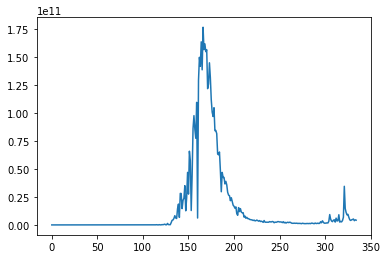

In [149]:
plt.plot(tot_loss)

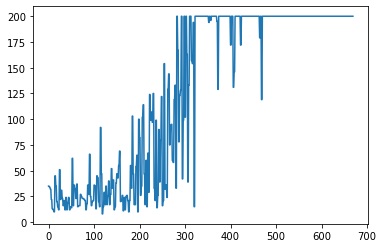

In [150]:
#Plot
plt.plot(tot_rewards)

In [152]:
#Render the final environment
state, info = env.reset(seed=42, return_info=True)
import time
for i in range(1000):
    
    env.render()
    
    state = torch.tensor(state, dtype=torch.float32)
    action = np.argmax(model(state).detach().numpy())
    state, reward, done, info = env.step(action)

    if done:
        state, info = env.reset(return_info=True)
env.close()


In [41]:
import numpy as np
batch_size, seq_len = 3, 5
A = np.zeros((batch_size, seq_len))
A[0,0:] = 1
A[1,0:] = 2
A[2,0:] = 3

In [42]:
A

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.]])

In [43]:
A4 = A.reshape(seq_len, -1)

In [44]:
A4

array([[1., 1., 1.],
       [1., 1., 2.],
       [2., 2., 2.],
       [2., 3., 3.],
       [3., 3., 3.]])